In [2]:
!pip install Pillow


   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.0 MB 3.0 MB/s eta 0:00:03
   ----------- ---------------------------- 2.1/7.0 MB 3.8 MB/s eta 0:00:02
   ---------------- ----------------------- 2.9/7.0 MB 3.9 MB/s eta 0:00:02
   ---------------------- ----------------- 3.9/7.0 MB 4.2 MB/s eta 0:00:01
   ----------------------------- ---------- 5.2/7.0 MB 4.6 MB/s eta 0:00:01
   ----------------------------------- ---- 6.3/7.0 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 4.7 MB/s  0:00:01



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os
import numpy as np
from PIL import Image


In [5]:
# Create folders (if not already created)
os.makedirs("data/raw/ice", exist_ok=True)
os.makedirs("data/raw/no_ice", exist_ok=True)

# Create fake "ice" and "no ice" images
for i in range(50):  # you can change number if you want more images
    ice = np.random.randint(180, 255, (128,128,3), dtype=np.uint8)
    Image.fromarray(ice).save(f"data/raw/ice/img_{i}.jpg")
    
    water = np.random.randint(0, 100, (128,128,3), dtype=np.uint8)
    Image.fromarray(water).save(f"data/raw/no_ice/img_{i}.jpg")

print("✅ Fake dataset created successfully!")


✅ Fake dataset created successfully!


In [6]:
!pip install tensorflow


   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/332.0 MB 4.3 MB/s eta 0:01:17
   ---------------------------------------- 1.0/332.0 MB 2.9 MB/s eta 0:01:55
   ---------------------------------------- 1.8/332.0 MB 2.9 MB/s eta 0:01:53
   ---------------------------------------- 2.6/332.0 MB 3.3 MB/s eta 0:01:40
   ---------------------------------------- 3.4/332.0 MB 3.4 MB/s eta 0:01:36
    --------------------------------------- 4.5/332.0 MB 3.7 MB/s eta 0:01:30
    --------------------------------------- 5.2/332.0 MB 3.7 MB/s eta 0:01:28
    --------------------------------------- 6.0/332.0 MB 3.9 MB/s eta 0:01:24
    --------------------------------------- 7.1/332.0 MB 3.8 MB/s eta 0:01:25
    --------------------------------------- 7.9/332.0 MB 3.8 MB/s eta 0:01:25
   - -------------------------------------- 9.2/332.0 MB 4.1 MB/s eta 0:01:19
   - -------------------------------------- 9.7/332.0 MB 3.9 MB/s eta 0


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install tensorflow pillow scikit-learn matplotlib numpy


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.3 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/8.1 MB 1.3 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/8.1 MB 868.4 kB/s eta 0:00:09
   ----- ---------------------------------- 1.0/8.1 MB 899.2 kB/s eta 0:00:08
   ------ --------------------------------- 1.3/8.1 MB 880.9 kB/s eta 0:00:08
   ------ --------------------------------- 1.3/8.1 MB 880.9 kB/s eta 0:00:08
   ------- -------------------------------- 1.6/8.1 MB 885.1 kB/s eta 0:00:08
   --------- ------------------------------ 1.8/8.1 MB 859.8 kB/s eta 0:00:08
   --------- ------------------------------ 1.8/8.1 MB 859.8 kB/s eta 0:00:08
   --------- -------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import os
import numpy as np
from PIL import Image

# Create folders
os.makedirs("data/raw/ice", exist_ok=True)
os.makedirs("data/raw/no_ice", exist_ok=True)
os.makedirs("models", exist_ok=True)

# Generate fake images for ice and no_ice (synthetic dataset)
for i in range(50):
    # ice = bright, white-ish images
    ice = np.random.randint(180, 255, (128,128,3), dtype=np.uint8)
    Image.fromarray(ice).save(f"data/raw/ice/img_{i}.jpg")

    # no_ice = dark, ocean-like images
    water = np.random.randint(0, 100, (128,128,3), dtype=np.uint8)
    Image.fromarray(water).save(f"data/raw/no_ice/img_{i}.jpg")

print("✅ Dummy dataset created!")


✅ Dummy dataset created!


In [9]:
from sklearn.model_selection import train_test_split

ice_path = "data/raw/ice"
no_ice_path = "data/raw/no_ice"

def load_images_from_folder(folder, label):
    data = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = Image.open(img_path).convert("RGB")
            img = img.resize((128, 128))
            data.append((np.array(img), label))
        except:
            pass
    return data

# Load both folders
ice_data = load_images_from_folder(ice_path, 1)
no_ice_data = load_images_from_folder(no_ice_path, 0)

dataset = ice_data + no_ice_data
X = np.array([item[0] for item in dataset])
y = np.array([item[1] for item in dataset])

# Normalize pixel values
X = X / 255.0

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data ready!")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


✅ Data ready!
Training samples: 80
Testing samples: 20


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\font_manager.py", line 1136, in addfont
    font = ft2font.FT2Font(path)
OSError: [Errno 22] Invalid argument
Exception ignored in: 'read_from_file_callback'
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\font_manager.py", line 1136, in addfont
    font = ft2font.FT2Font(path)
OSError: [Errno 22] Invalid argument


In [11]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.summary()


C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print("✅ Model compiled successfully!")


✅ Model compiled successfully!


In [14]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=8,
    validation_data=(X_test, y_test)
)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.6875 - loss: 1.3763 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 1.0000 - loss: 0.0110 - val_accuracy: 1.0000 - val_loss: 4.6852e-05
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.9875 - loss: 0.0157 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 6.7173e-08
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 1.0000 - loss: 1.7950e-06 - val_accuracy: 1.0000 - val_loss: 5.6234e-10
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 1.0000 - loss: 3.4635e-05 - val_accuracy: 1.0000 - val_loss: 2.6484e-10
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 1.0000 - loss: 7.9801e-08 - val_accuracy: 1.0000 - val_loss: 9.3944e-11
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 1.0000 -

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 1.0000 - loss: 1.5982e-10
✅ Test Accuracy: 100.00%


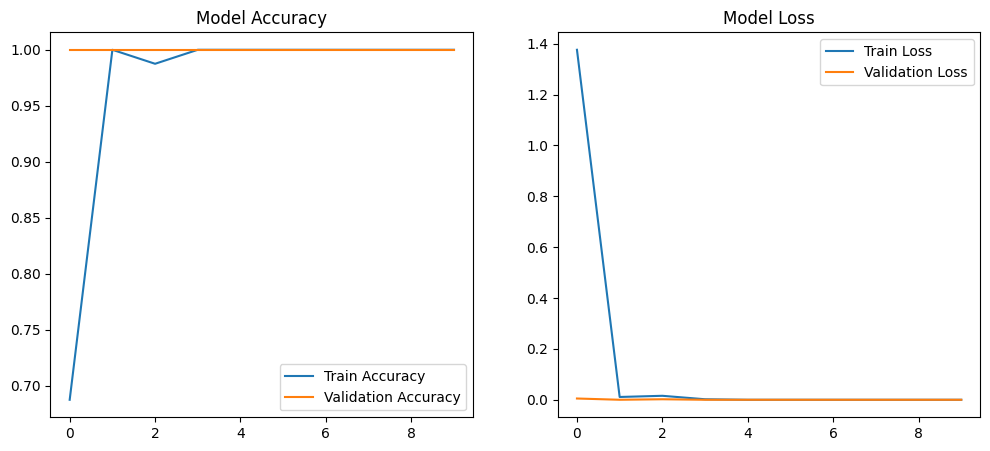

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


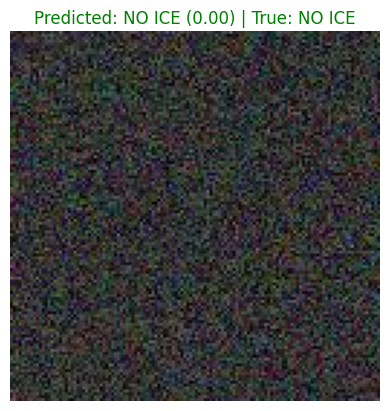

In [17]:
import random

# Pick a random test image
idx = random.randint(0, len(X_test)-1)
img = X_test[idx]
true_label = y_test[idx]

# Predict
pred = model.predict(img.reshape(1,128,128,3))[0][0]

# Display
plt.imshow(img)
plt.axis('off')

label = "ICE" if pred > 0.5 else "NO ICE"
color = "blue" if pred > 0.5 else "green"

plt.title(f"Predicted: {label} ({pred:.2f}) | True: {'ICE' if true_label==1 else 'NO ICE'}", color=color)
plt.show()


In [18]:
model.save("models/sea_ice_cnn_model.h5")
print("✅ Model saved successfully!")


✅ Model saved successfully!
